In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [43]:
import pandas as pd
import numpy as np



In [44]:
data=pd.read_csv('../input/diabetes/diabetes.csv')

In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [48]:
import seaborn as sns

<AxesSubplot:>

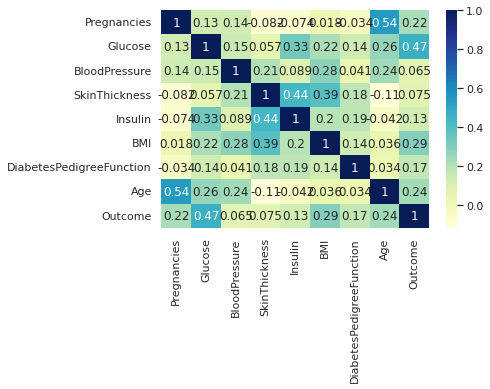

In [49]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [50]:
x=data.iloc[:,:8]
y=data.iloc[:,-1]

In [51]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)

K-NEIGHBOURS CLASSIFICATION

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[173  22]
 [ 74  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       195
           1       0.64      0.35      0.45       113

    accuracy                           0.69       308
   macro avg       0.67      0.62      0.62       308
weighted avg       0.68      0.69      0.66       308

Accuracy: 0.6883116883116883


In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.3116883116883117

SVM

In [59]:
import statsmodels.api as sm
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [60]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0,

In [61]:
data_with_clusters.columns
data_with_clusters.columns = data_with_clusters.columns.str.strip()
print('Longitude' in data_with_clusters.columns)
print('Latitude' in data_with_clusters.columns)


False
False


#LINEAR REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [63]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [64]:
print("training score:",lg.score(x_train,y_train))
print("testing score:",lg.score(x_test,y_test))

training score: 0.7804347826086957
testing score: 0.762987012987013


In [65]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [66]:
print("training score:",sv.score(x_train,y_train))
print("testing score:",sv.score(x_test,y_test))

training score: 0.8369565217391305
testing score: 0.7694805194805194


DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
print("training score:",dt.score(x_train,y_train))
print("testing score:",dt.score(x_test,y_test))
pred=dt.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

training score: 1.0
testing score: 0.7207792207792207
accuracy: 0.7207792207792207


NAIVE BAYES

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [72]:
GaussianNB()

GaussianNB()

In [73]:
print("training score:",nb.score(x_train,y_train))
print("testing score:",nb.score(x_test,y_test))
pred=nb.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

training score: 0.7565217391304347
testing score: 0.7727272727272727
accuracy: 0.7727272727272727


MLP CLASSIFIER

In [74]:
from sklearn.neural_network import MLPClassifier

In [75]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [76]:
print("training score:",mlp.score(x_train,y_train))
print("testing score:",mlp.score(x_test,y_test))
pred=mlp.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

training score: 0.8195652173913044
testing score: 0.7662337662337663
accuracy: 0.7662337662337663


random forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
print("training score:",rf.score(x_train,y_train))
print("testing score:",rf.score(x_test,y_test))

training score: 0.8917990481226864
testing score: 0.31701576582709334


In [80]:
models=["KNN","DECISION TREE","naive bayes","mlp classifier","random forest"]
accuracy=[0.7467532467532467,0.7175324675324676,0.28073646377390105,0.775974025974026,0.326093928638147]

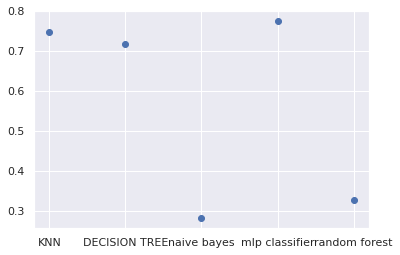

In [81]:
import matplotlib.pyplot as plt
plt.scatter(models,accuracy)
plt.show()

<AxesSubplot:>

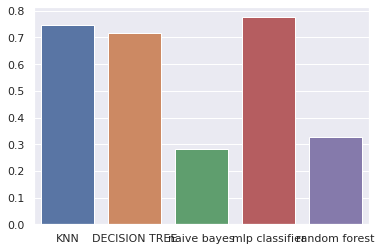

In [82]:
import seaborn as sns
sns.barplot(models,accuracy)